In [13]:
pip install pandas matplotlib scikit-learn nltk gensim

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\juan-\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import nltk

In [16]:
# Define the paths to your CSV files
synthetic_dataset_path = r"C:\Users\juan-\Documents\Proyecto Hacku AI\Repositorio GitHub página\proyecto_integrador_equipo_27\synthetic_dataset.csv"
validation_data_path = r"C:\Users\juan-\Documents\Proyecto Hacku AI\Repositorio GitHub página\proyecto_integrador_equipo_27\Validation Data.csv"

# Read the CSV files into DataFrames
synthetic_df = pd.read_csv(synthetic_dataset_path)
df = pd.read_csv(validation_data_path)

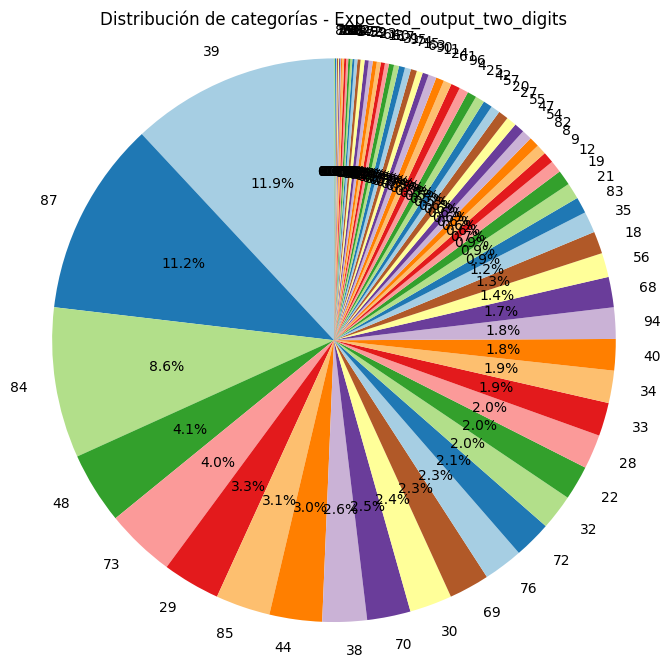

In [17]:

# Agrupar los datos por la columna Expected_output_two_digits y contar las ocurrencias
category_counts = df['Expected_output_two_digits'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Agregar un título
plt.title('Distribución de categorías - Expected_output_two_digits')

# Mostrar el gráfico
plt.axis('equal')  # Para asegurar que el gráfico de pastel sea circular
plt.show()

In [19]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Función para normalizar el texto
def normalize_text(text):
    if isinstance(text, str):  # Verificar si el texto es una cadena
        # Convertir a minúsculas
        text = text.lower()
        # Eliminar números
        text = re.sub(r'\d+', '', text)
        # Eliminar puntuación
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Eliminar espacios extra
        text = text.strip()
        # Tokenización
        tokens = word_tokenize(text)
        # Eliminar stopwords (palabras vacías)
        stop_words = set(stopwords.words('spanish'))  # Cambia a 'english' si los datos están en inglés
        tokens = [word for word in tokens if word not in stop_words]
        return tokens
    else:
        return []  # Devolver una lista vacía si no es un string

# Aplicar la normalización a la columna Validation_input
df['Normalized_input'] = df['Validation_input'].apply(normalize_text)

# Entrenar el modelo Word2Vec con los datos normalizados
sentences = df['Normalized_input'].tolist()  # Lista de oraciones tokenizadas
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

first_word = model.wv.index_to_key[0]  # Acceder al primer key
# Ejemplo de cómo obtener el vector de una palabra
vector = model.wv[first_word]  # Cambia 'ejemplo' por cualquier palabra que te interese

# Asociar las etiquetas de salida (Expected_output_four_digits)
output_labels = df['Expected_output_four_digits'].tolist()

# Visualizar algunos vectores de palabras
print(f"Vector de 'ejemplo': {vector}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\juan-\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\juan-\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\juan-\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Vector de 'ejemplo': [-0.12115772  0.42628622  0.0833452   0.01939967  0.10286383 -0.54360163
  0.15919621  0.6353822  -0.29875666 -0.32277074 -0.14585005 -0.692234
 -0.10218055  0.15446654  0.13196108 -0.17580867  0.05771604 -0.36287022
 -0.01004259 -0.77632326  0.15817456  0.17622633  0.15186398 -0.35322782
 -0.06128158  0.05196411 -0.2914393  -0.27222854 -0.14118907 -0.05542441
  0.36711773 -0.00666678  0.1290473  -0.22634992 -0.09470321  0.4059573
  0.0499532  -0.46186095 -0.12524182 -0.7255695   0.02892395 -0.38084534
 -0.03017303  0.03855373  0.26547495 -0.1608825  -0.27465776 -0.07290585
  0.20945667  0.2399193   0.10531923 -0.29548863  0.012906    0.11214104
 -0.23654953  0.2068415   0.1461512  -0.06003123 -0.40819687  0.15113468
  0.18196915  0.13367383 -0.10621392  0.08053936 -0.4320007   0.38993424
  0.10456534  0.2767624  -0.56287175  0.46340615 -0.24401842  0.15508592
  0.42110416 -0.17828408  0.34862643  0.16544111  0.048196   -0.02366748
 -0.28415495  0.17299919 -0.14770

In [20]:
!pip install pandas matplotlib wordcloud nltk


   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ------- ------------------------------- 61.4/300.2 kB 825.8 kB/s eta 0:00:01
   --------------------------- ------------ 204.8/300.2 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\juan-\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


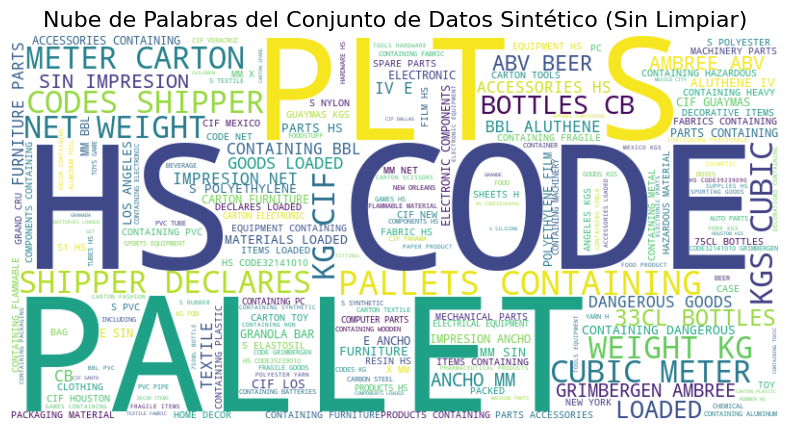

In [21]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Concatenar todas las descripciones en un solo texto
text = ' '.join(synthetic_df['Description'].dropna())

# Crear la nube de palabras sin limpiar stopwords
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    max_words=200, 
    colormap='viridis'
).generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras del Conjunto de Datos Sintético (Sin Limpiar)', fontsize=16)
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\juan-\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


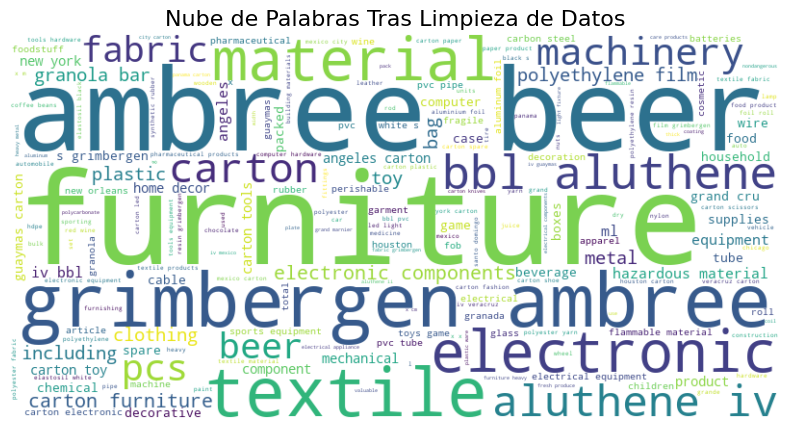

In [27]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import string
import re

# Descargar stopwords de nltk
nltk.download('stopwords')

# Definir stopwords en español y las stopwords adicionales específicas del contexto
stop_words = set(stopwords.words('spanish'))
# Lista refinada de stopwords específicas del contexto
additional_stopwords = {
    'hs', 'code', 'hscode', 'hs-code', 'hs  code', 'pallets', 'plts', 'shipper', 'declares', 
    'containing', 'contains', 'meter', 'cubic', 'packages', 'load', 'loaded', 'weight', 
    'netweight', 'kg', 'kgs', 'cb', 'cbm', 'goods', 'parts', 'pieces', 'accessories', 'packing', 
    'declared', 'dangerous', 'impression', 'items', 'sheets', 'codes', 
    'sin', 'impresion', 'containers', 'pc', 'abv', 'net', 'gross', 'cif', 'aduana', 'customs', 
    'value', 'tax', 'duty', 'freight', 'port', 'terminal', 'consignee', 'consignor', 'invoice', 
    'manifest', 'quantity', 'description', 'volume', 'packaging', 'shipment', 'delivery', 'origin', 
    'destination', 'transport', 'carrier', 'export', 'import', 'tariff', 'item', 'declaration', 
    'clearance', 'documentation', 'commercial', 'charge', 'fees', 'logistics', 'shipping', 
    'container', 'unit', 'measurement', 'certification', 'palletized', 'metric', 'commodity', 
    'classification', 'entry', 'exportation', 'importation', 'bonded', 'zone', 'trade', 'license', 'bottle', 'bottles', 'cl',
    'ancho', 'largo', 'mm'
}

# Combinar stopwords estándar con stopwords del contexto específico
stop_words.update(additional_stopwords)

# Función para limpiar el texto
def clean_text(text):
    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r'\d+', '', text)  # Eliminar números
    text = text.translate(str.maketrans('', '', string.punctuation))  # Eliminar signos de puntuación
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Eliminar stopwords
    return text

# Aplicar la función de limpieza a la columna Description
cleaned_text = ' '.join(synthetic_df['Description'].dropna().apply(clean_text))

# Crear la nube de palabras limpia
wordcloud_cleaned = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    max_words=200, 
    colormap='viridis'
).generate(cleaned_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_cleaned, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras Tras Limpieza de Datos', fontsize=16)
plt.show()



In [28]:
# Instalar bibliotecas necesarias
!pip install seaborn matplotlib scikit-learn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   -------- ------------------------------ 61.4/294.9 kB 825.8 kB/s eta 0:00:01
   --------------------------- ------------ 204.8/294.9 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\juan-\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
# Descargar stopwords de nltk
nltk.download('stopwords')

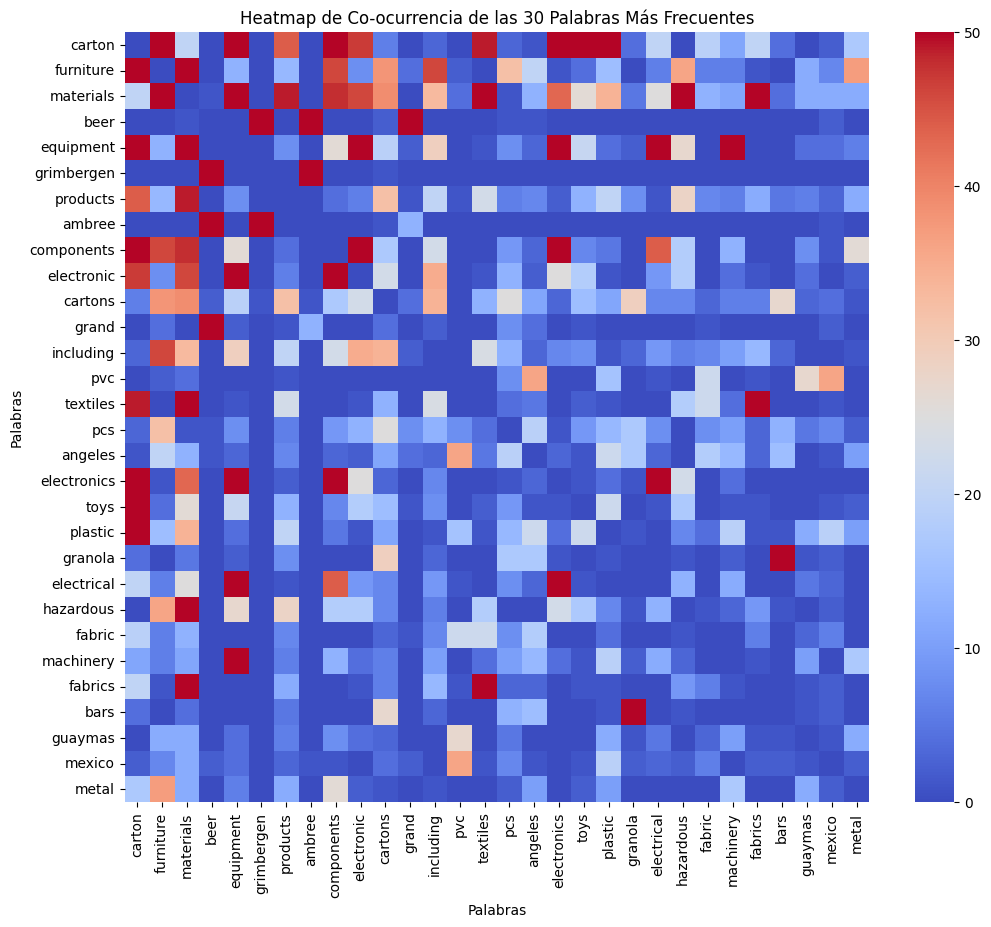

In [41]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
import string
import re

# Definir stopwords en español y las stopwords adicionales específicas del contexto
stop_words = set(stopwords.words('spanish'))
# Lista refinada de stopwords específicas del contexto
additional_stopwords = {
    'hs', 'code', 'hscode', 'hs-code', 'hs  code', 'pallets', 'plts', 'shipper', 'declares', 
    'containing', 'contains', 'meter', 'cubic', 'packages', 'load', 'loaded', 'weight', 
    'netweight', 'kg', 'kgs', 'cb', 'cbm', 'goods', 'parts', 'pieces', 'accessories', 'packing', 
    'declared', 'dangerous', 'impression', 'items', 'sheets', 'codes', 
    'sin', 'impresion', 'containers', 'pc', 'abv', 'net', 'gross', 'cif', 'aduana', 'customs', 
    'value', 'tax', 'duty', 'freight', 'port', 'terminal', 'consignee', 'consignor', 'invoice', 
    'manifest', 'quantity', 'description', 'volume', 'packaging', 'shipment', 'delivery', 'origin', 
    'destination', 'transport', 'carrier', 'export', 'import', 'tariff', 'item', 'declaration', 
    'clearance', 'documentation', 'commercial', 'charge', 'fees', 'logistics', 'shipping', 
    'container', 'unit', 'measurement', 'certification', 'palletized', 'metric', 'commodity', 
    'classification', 'entry', 'exportation', 'importation', 'bonded', 'zone', 'trade', 'license', 'bottle', 'bottles', 'cl',
    'ancho', 'largo', 'mm', 'and', 'of', 'in', 'each', 'on', 'for', 'with', 'bbl', 'iv', 'new', 'ml'
}

# Combinar stopwords estándar con stopwords del contexto específico
stop_words.update(additional_stopwords)

# Función para limpiar el texto
def clean_text(text):
    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r'\d+', '', text)  # Eliminar números
    text = text.translate(str.maketrans('', '', string.punctuation))  # Eliminar signos de puntuación
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Eliminar stopwords
    return text

# Aplicar la función de limpieza a la columna Description
synthetic_df['Cleaned_Description'] = synthetic_df['Description'].dropna().apply(clean_text)

# Vectorización del texto
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(synthetic_df['Cleaned_Description'])

# Construcción de la matriz de co-ocurrencia
co_occurrence = (X.T * X)  # Matriz de términos
co_occurrence.setdiag(0)   # Eliminar la diagonal (no se considera co-ocurrencia consigo mismo)

# Crear el DataFrame del heatmap
terms = vectorizer.get_feature_names_out()
co_occurrence_df = pd.DataFrame(co_occurrence.toarray(), index=terms, columns=terms)

# Filtrar las 30 palabras más frecuentes
co_occurrence_sums = co_occurrence_df.sum(axis=1)
top_terms = co_occurrence_sums.nlargest(30).index

# Crear un DataFrame reducido solo con los términos más frecuentes
co_occurrence_filtered = co_occurrence_df.loc[top_terms, top_terms]

# Generar el Heatmap de términos filtrados
plt.figure(figsize=(12, 10))
sns.heatmap(co_occurrence_filtered, cmap='coolwarm', cbar=True, vmin=0, vmax=50)
plt.title('Heatmap de Co-ocurrencia de las 30 Palabras Más Frecuentes')
plt.xlabel('Palabras')
plt.ylabel('Palabras')
plt.show()



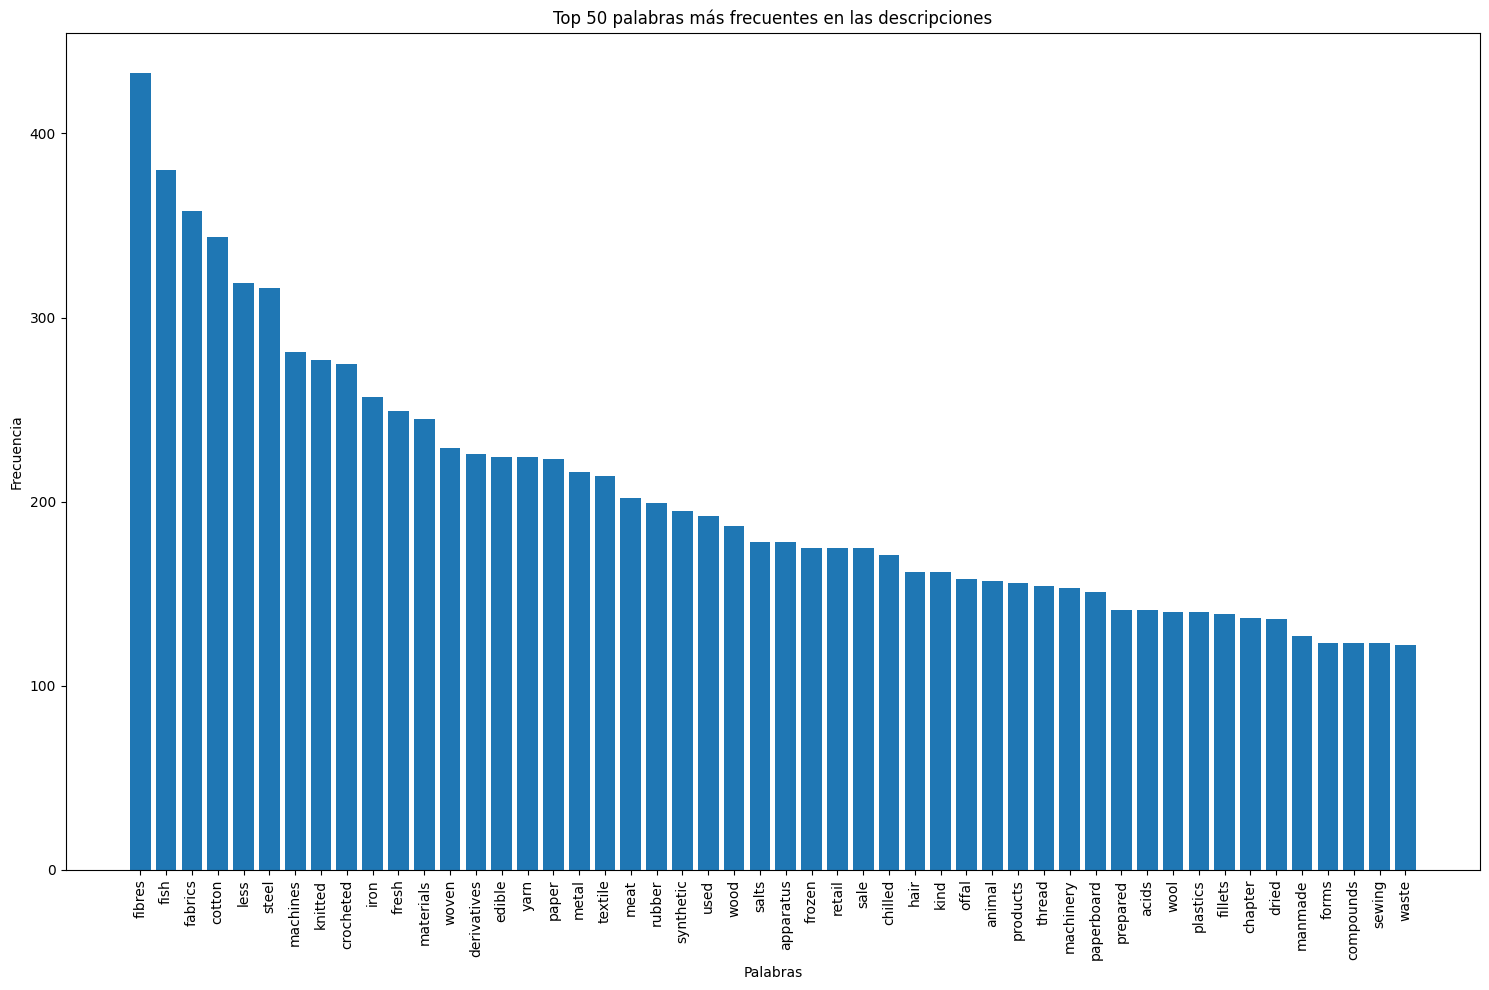

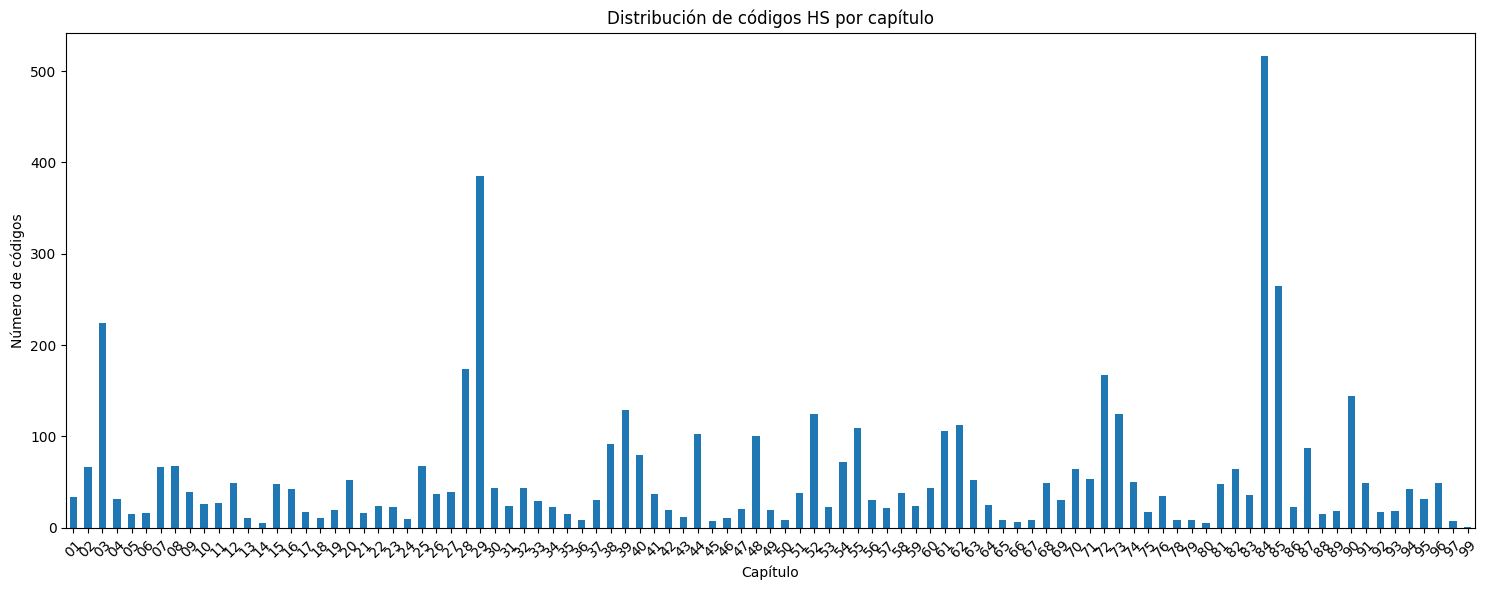

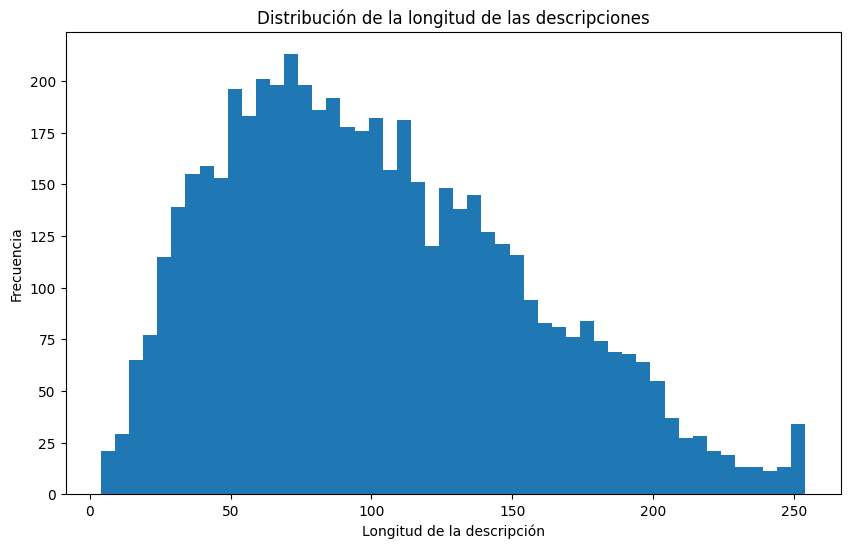

Longitud promedio de descripción: 101.64
Longitud mínima de descripción: 4
Longitud máxima de descripción: 254

Top 50 capítulos con más códigos:
Chapter
84    516
29    385
85    265
03    224
28    174
72    167
90    144
39    129
52    124
73    124
62    112
55    109
61    106
44    103
48    101
38     92
87     87
40     80
54     72
08     68
25     68
07     67
02     66
70     64
82     64
71     53
20     52
63     52
74     50
12     49
68     49
91     49
96     49
15     48
81     48
30     44
32     44
60     44
16     42
94     42
09     39
27     39
51     38
58     38
26     37
41     37
83     36
76     35
01     34
04     32
Name: count, dtype: int64


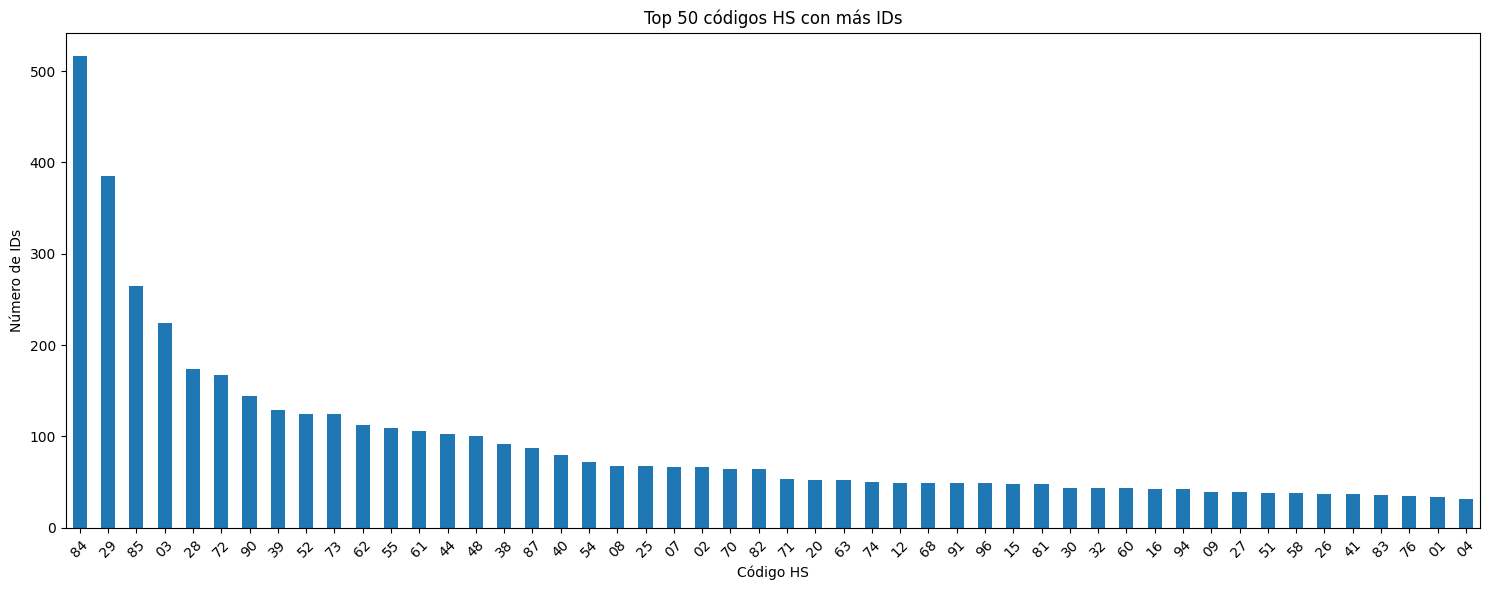

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
import re

# Cargar los datos
catalogue_df = pd.read_csv(r"C:\Users\juan-\Documents\Proyecto Hacku AI\Repositorio GitHub página\proyecto_integrador_equipo_27\HS Code catalogue.csv")

# Asegurar que el código tenga 6 dígitos
catalogue_df['code'] = catalogue_df['code'].astype(str).str.zfill(6)

# Definir stopwords personalizadas
custom_stopwords = set(["no", "nec", "not", "excluding", "nos", "containing", "exclusing", "exceeding", "nada",
                        'hs', 'code', 'hscode', 'hs-code', 'hs  code', 'pallets', 'plts', 'shipper', 
                        'declares', 'containing', 'contains', 'meter', 'cubic', 'packages', 'load', 
                        'loaded', 'weight', 'netweight', 'kg', 'kgs', 'cb', 'cbm', 'goods', 'parts', 
                        'pieces', 'accessories', 'packing', 'declared', 'dangerous', 'impression', 
                        'items', 'sheets', 'codes', 'sin', 'impresion', 'containers', 'pc', 'abv', 
                        'net', 'gross', 'cif', 'aduana', 'customs', 'value', 'tax', 'duty', 'freight', 
                        'port', 'terminal', 'consignee', 'consignor', 'invoice', 'manifest', 
                        'quantity', 'description', 'volume', 'packaging', 'shipment', 'delivery', 
                        'origin', 'destination', 'transport', 'carrier', 'export', 'import', 
                        'tariff', 'item', 'declaration', 'clearance', 'documentation', 'commercial', 
                        'charge', 'fees', 'logistics', 'shipping', 'container', 'unit', 
                        'measurement', 'certification', 'palletized', 'metric', 'commodity', 
                        'classification', 'entry', 'exportation', 'importation', 'bonded', 'zone', 
                        'trade', 'license', 'bottle', 'bottles', 'cl', 'ancho', 'largo', 'mm', 
                        'and', 'of', 'in', 'each', 'on', 'for', 'with', 'bbl', 'iv', 'new', 'ml', 
                        'subheadings', 'heading', 'whether', 'similar', 'preparations', 'articles', 
                        'without', 'including', 'thereof', 'width', 'gm', 'spp'])

# Agregar las stopwords de NLTK
stop_words = set(stopwords.words('english')).union(custom_stopwords)

# Función para limpiar el texto
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar signos de puntuación y números
    text = re.sub(r'[^a-z\s]', '', text)
    return text

# Limpiar las descripciones
catalogue_df['cleaned_description'] = catalogue_df['description'].apply(clean_text)

# 1. Top 50 palabras más frecuentes en las descripciones
plt.figure(figsize=(15, 10))
words = ' '.join(catalogue_df['cleaned_description']).split()
words = [word for word in words if word not in stop_words]
word_freq = Counter(words).most_common(50)
words, freq = zip(*word_freq)
plt.bar(words, freq)
plt.xticks(rotation=90)
plt.title('Top 50 palabras más frecuentes en las descripciones')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# 2. Distribución de códigos HS por los primeros dos dígitos (capítulo)
catalogue_df['Chapter'] = catalogue_df['code'].str[:2]
chapter_counts = catalogue_df['Chapter'].value_counts().sort_index()

plt.figure(figsize=(15, 6))
chapter_counts.plot(kind='bar')
plt.title('Distribución de códigos HS por capítulo')
plt.xlabel('Capítulo')
plt.ylabel('Número de códigos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Análisis de la longitud de las descripciones
catalogue_df['Description_Length'] = catalogue_df['description'].str.len()
plt.figure(figsize=(10, 6))
plt.hist(catalogue_df['Description_Length'], bins=50)
plt.title('Distribución de la longitud de las descripciones')
plt.xlabel('Longitud de la descripción')
plt.ylabel('Frecuencia')
plt.show()

print(f"Longitud promedio de descripción: {catalogue_df['Description_Length'].mean():.2f}")
print(f"Longitud mínima de descripción: {catalogue_df['Description_Length'].min()}")
print(f"Longitud máxima de descripción: {catalogue_df['Description_Length'].max()}")

# Análisis adicional: Top 50 capítulos con más códigos
top_50_chapters = chapter_counts.nlargest(50)
print("\nTop 50 capítulos con más códigos:")
print(top_50_chapters)

plt.figure(figsize=(15, 6))
top_50_chapters.plot(kind='bar')
plt.title('Top 50 códigos HS con más IDs')
plt.xlabel('Código HS')
plt.ylabel('Número de IDs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [ ]:
# Crear un mapeo de capítulos a sus nombres (ajusta según tus datos)
chapter_names = {
    '01': 'Animales vivos',
    '02': 'Carne y despojos comestibles',
    '03': 'Pescados y crustáceos',
    '04': 'Lácteos, huevos, miel y productos comestibles de origen animal',
    '05': 'Productos de origen animal, no clasificados en otra parte',
    '06': 'Plantas vivas y productos de la floricultura',
    '07': 'Hortalizas, legumbres y ciertas raíces y tubérculos comestibles',
    '08': 'Frutas y frutos comestibles, cáscaras de cítricos y melones',
    '09': 'Café, té, yerbas mate y especias',
    '10': 'Cereales',
    '11': 'Productos de la molinería; malta; almidones y féculas; inulina; gluten',
    '12': 'Semillas y frutos oleaginosos; semillas de algodón; otras semillas y frutos; plantas industriales',
    '13': 'Gomas, resinas y otros extractos vegetales',
    '14': 'Vegetales diversos; plantas de uso medicinal o industrial',
    '15': 'Grasas y aceites animales o vegetales; productos de su descomposición',
    '16': 'Preparaciones de carne, pescado o crustáceos; preparaciones alimenticias a base de productos de origen animal',
    '17': 'Azúcares y artículos de confitería',
    '18': 'Cacao y sus preparaciones',
    '19': 'Preparaciones a base de cereales, harina, almidón o féculas',
    '20': 'Preparaciones de hortalizas, frutas o frutos, nueces y otros productos vegetales',
    '21': 'Preparaciones alimenticias diversas',
    '22': 'Bebidas, líquidos alcohólicos y vinagre',
    '23': 'Residuos y desperdicios de la industria alimentaria; alimentos preparados para animales',
    '24': 'Tabacos y manufacturas de tabaco',
    '25': 'Sal, azufre, tierras y piedras; yeso, cal y cemento',
    '26': 'Minerales metálicos',
    '27': 'Combustibles minerales, aceites minerales y productos de su destilación; materias bituminosas; ceras minerales',
    '28': 'Productos químicos inorgánicos; productos químicos orgánicos; materias colorantes; productos químicos diversos',
    '29': 'Productos químicos orgánicos',
    '30': 'Productos farmacéuticos',
    '31': 'Fertilizantes',
    '32': 'Extractos de plantas, taninos y productos vegetales',
    '33': 'Aceites esenciales y resinoides; productos de perfumería y cosméticos',
    '34': 'Jabones, detergentes, ceras, productos de limpieza y productos de tocador',
    '35': 'Productos alimenticios de origen animal y vegetal; mezclas alimenticias',
    '36': 'Explosivos; pirotecnia; artículos de pirotecnia',
    '37': 'Productos fotográficos',
    '38': 'Productos químicos diversos',
    '39': 'Plásticos y sus manufacturas',
    '40': 'Caucho y sus manufacturas',
    '41': 'Pieles y cueros',
    '42': 'Artículos de cuero; artículos de viaje; manufacturas de piel',
    '43': 'Pieles de animales, sin curtir o curtidas; pelajes y productos de pelaje',
    '44': 'Madera y sus manufacturas',
    '45': 'Corcho y sus manufacturas',
    '46': 'Manufacturas de fibras vegetales',
    '47': 'Pulpa de madera; productos de la industria de la pasta de papel',
    '48': 'Papel y cartón; manufacturas de papel y cartón',
    '49': 'Publicaciones impresas',
    '50': 'Seda',
    '51': 'Lana y pelos finos; manufacturas de lana y pelos finos',
    '52': 'Algodón; manufacturas de algodón',
    '53': 'Otras fibras vegetales',
    '54': 'Filamentos sintéticos o artificiales',
    '55': 'Fibras sintéticas o artificiales',
    '56': 'Fibras y productos textiles no tejidos',
    '57': 'Alfombras y similares',
    '58': 'Tejidos especiales',
    '59': 'Tejidos recubiertos o impregnados',
    '60': 'Tejidos de punto',
    '61': 'Prendas de vestir y complementos de punto',
    '62': 'Prendas de vestir y complementos de tejido',
    '63': 'Artículos textiles diversos',
    '64': 'Calzado, partes de calzado y otros artículos de uso similar',
    '65': 'Sombreros y gorras; partes de sombreros y gorras',
    '66': 'Paraguas, sombrillas, bastones y artículos similares',
    '67': 'Plumas y plumería; artículos manufacturados de plumas o plumería',
    '68': 'Artículos de piedra, yeso, cemento, amianto, mica o materia similar',
    '69': 'Cerámica',
    '70': 'Vidrio y sus manufacturas',
    '71': 'Perlas, piedras preciosas y semipreciosas; metales preciosos; manufacturas de metales preciosos',
    '72': 'Acero y fundición',
    '73': 'Manufacturas de hierro y acero',
    '74': 'Cobre y manufacturas de cobre',
    '75': 'Níquel y manufacturas de níquel',
    '76': 'Aluminio y manufacturas de aluminio',
    '78': 'Plomo y manufacturas de plomo',
    '79': 'Zinc y manufacturas de zinc',
    '80': 'Estaño y manufacturas de estaño',
    '81': 'Otros metales; manufacturas de otros metales',
    '82': 'Herramientas y artículos de cuchillería',
    '83': 'Manufacturas de metal',
    '84': 'Máquinas y aparatos mecánicos; material eléctrico y sus partes',
    '85': 'Aparatos eléctricos; material eléctrico y sus partes',
    '86': 'Material ferroviario',
    '87': 'Vehículos terrestres y sus partes',
    '88': 'Aeronaves y naves espaciales',
    '89': 'Naves y embarcaciones',
    '90': 'Instrumentos y aparatos ópticos; instrumentos y aparatos de medida; instrumentos médicos',
    '91': 'Relojes y relojería',
    '92': 'Instrumentos musicales',
    '93': 'Armas y municiones; partes de armas y municiones',
    '94': 'Muebles; artículos de iluminación; señalización y artículos similares',
    '95': 'Juguetes, juegos y artículos para deportes',
    '96': 'Manufacturas diversas',
    '97': 'Objetos de arte, antigüedades y colecciones'
}